# Simple linear regression excercises

$Y_{i} = \beta_{0} + \beta_{1} X_{i} + \epsilon_{i}$

- $Y_{i}$: the dependent (random) variable 
- $X_{i}$: independent variable (not random)
- $\beta_{0}, \beta_{1}$: model parameters 
- $\epsilon_{i}$: random error, how the observation deviates from the population mean


In [2]:
# Load libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# Load confounds table
conf_path = "../data/sub-01_task-rhymejudgment_desc-confounds_regressors.tsv"
conf = pd.read_csv(conf_path, delimiter="\t")
# Print head of the confounds
print(conf.head())

# Print names of columns
print(conf.columns)

          csf  csf_derivative1     csf_power2  csf_derivative1_power2  \
0  661.664060              NaN  437799.328011                     NaN   
1  644.578523       -17.085537  415481.472246              291.915569   
2  635.412475        -9.166048  403749.013034               84.016440   
3  634.774600        -0.637874  402938.793280                0.406884   
4  634.872426         0.097826  403062.997290                0.009570   

   white_matter  white_matter_derivative1  white_matter_derivative1_power2  \
0    582.241511                       NaN                              NaN   
1    580.923387                 -1.318124                         1.737452   
2    580.771837                 -0.151551                         0.022968   
3    580.034297                 -0.737539                         0.543964   
4    579.979105                 -0.055192                         0.003046   

   white_matter_power2  global_signal  global_signal_derivative1  ...  \
0        339005.177

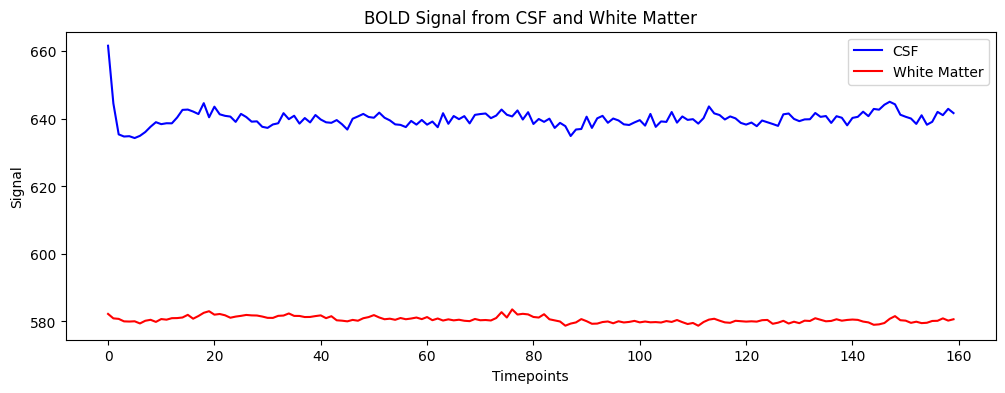

In [13]:
# Plot timeseries of BOLD signal from cerebrospinal fluid (csf) & white matter (white_matter) on one plot

# 选择 BOLD 信号列
csf_signal = conf['csf']
wm_signal = conf['white_matter']

# 绘图
plt.figure(figsize=(12,4))
plt.plot(csf_signal, label='CSF', color='blue')
plt.plot(wm_signal, label='White Matter', color='red')
plt.xlabel('Timepoints')
plt.ylabel('Signal')
plt.title('BOLD Signal from CSF and White Matter')
plt.legend()
plt.show()

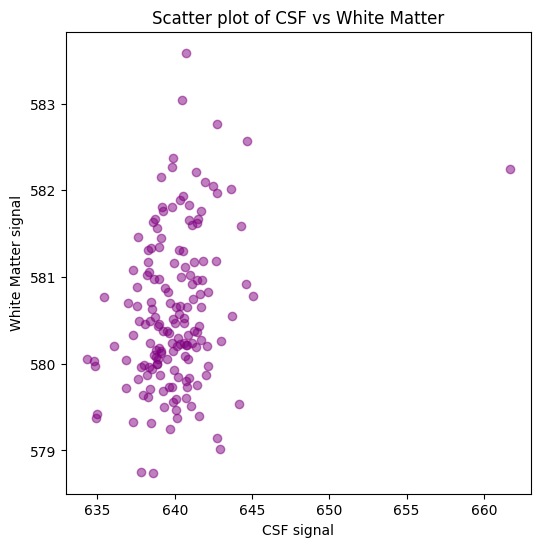

In [14]:
# Plot scatter
# 绘制散点图
plt.figure(figsize=(6,6))
plt.scatter(csf_signal, wm_signal, alpha=0.5, color='purple')
plt.xlabel('CSF signal')
plt.ylabel('White Matter signal')
plt.title('Scatter plot of CSF vs White Matter')
plt.show()

## Lets run linear regression!

In [17]:
from sklearn.linear_model import LinearRegression
csf = csf_signal.to_frame()
wm = wm_signal.to_frame()
linear_regression = LinearRegression() 
linear_regression.fit(wm, csf)

LinearRegression()

In [18]:
# Print beta (.coef_) & intercept (.intercept_) values
betas = linear_regression.coef_
intercept = linear_regression.intercept_

print("每个头动参数的β值：", betas)
print("截距：", intercept)

每个头动参数的β值： [[0.87327878]]
截距： [132.98154237]


In [20]:
# Add regression line on a scatterplot
x = np.linspace(580,585,100) # generates 100 number between 580 and 585


## Linear regression on images


In [21]:
# Load harry and syrius image
harry = np.load("../data/harry.npy")
syrius = np.load("../data/syrius.npy")

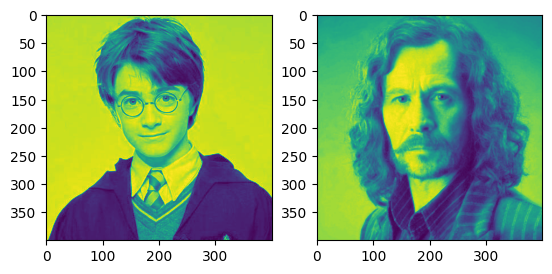

In [22]:
# Plot syrius & harry side-by-side
fig, ax = plt.subplots(1,2) 
ax[0].imshow(harry)
ax[1].imshow(syrius)

In [30]:
# Change harry & syrius to vectors
harry_vec = harry.ravel()
syrius_vec = syrius.ravel()

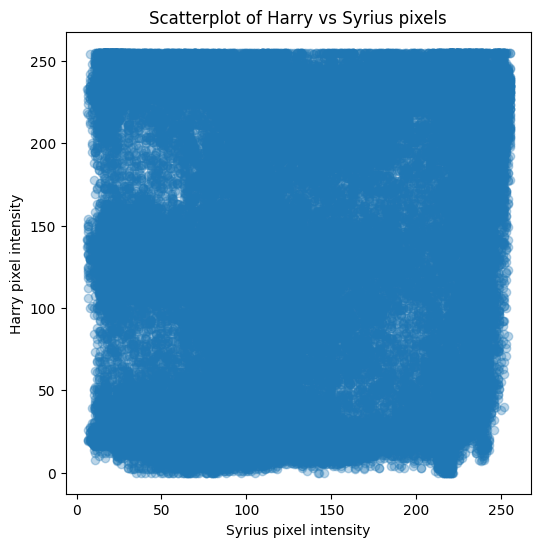

In [34]:
# Make a scatterplot
plt.figure(figsize=(6,6))
plt.scatter(syrius_vec, harry_vec, alpha=0.3)
plt.xlabel("Syrius pixel intensity")
plt.ylabel("Harry pixel intensity")
plt.title("Scatterplot of Harry vs Syrius pixels")
plt.show()


In [31]:
# Run linear regression
# 拟合线性回归
model = LinearRegression()
model.fit(harry_vec.reshape(-1, 1), syrius_vec.reshape(-1, 1))

LinearRegression()

In [33]:
# Print beta & intercept value
beta = model.coef_
intercept = model.intercept_
print(beta)
print(intercept)

[[0.16639277]]
[112.67897521]


ValueError: x and y must have same first dimension, but have shapes (100,) and (1, 100)

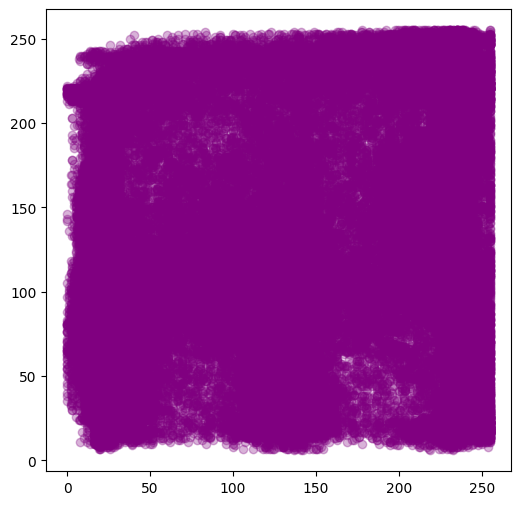

In [35]:
# Make scatter plot with overlayed regression line
# 生成散点图
plt.figure(figsize=(6,6))
plt.scatter(harry_vec, syrius_vec, alpha=0.3, color='purple', label='Data')

# 生成回归线
x_line = np.linspace(harry_vec.min(), harry_vec.max(), 100)
y_line = beta * x_line + intercept
plt.plot(x_line, y_line, color='red', linewidth=2, label='Regression line')

plt.xlabel("Harry pixel intensity")
plt.ylabel("Syrius pixel intensity")
plt.title("Harry vs Syrius pixels with regression line")
plt.legend()
plt.show()